In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


In [10]:
#load dataset
df = pd.read_csv(r"C:\Users\Hp\Downloads\Salary_dataset.csv")  


In [11]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [17]:
# Choose dependent and independent variable
X = df[['YearsExperience']]  
y = df['Salary']    

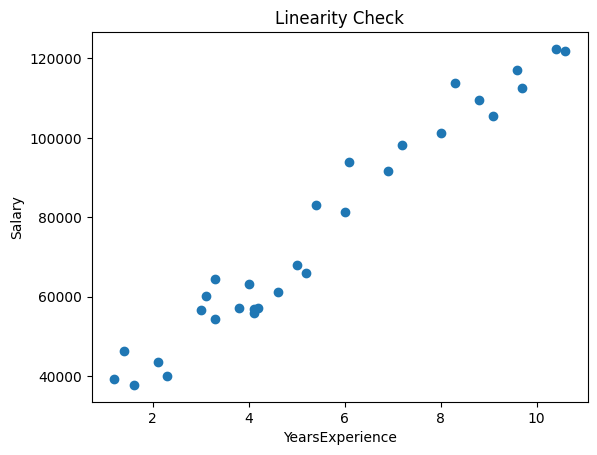

In [18]:
#Checking linearilty assumption
plt.scatter(X, y)
plt.title("Linearity Check")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [19]:
#train the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

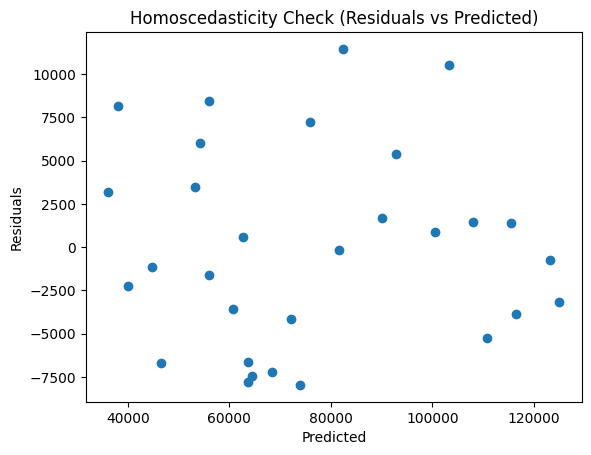

In [20]:
#homoscedasticity check. ideally: no funnel shape plot btw residuals and predicted values
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title("Homoscedasticity Check (Residuals vs Predicted)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [21]:
# 🔁 3. Independence (Durbin-Watson)
# Add constant for statsmodels
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
dw_stat = durbin_watson(ols_model.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")  # Close to 2 is ideal

Durbin-Watson Statistic: 1.6479910076183393


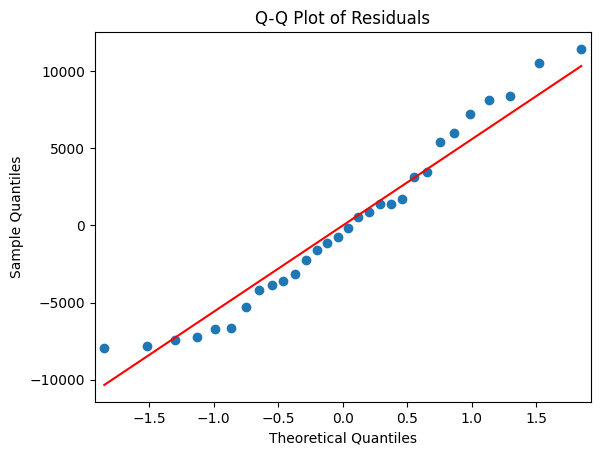

In [22]:
## Normality of residuals test. QQ plot shd be roughly a straight line
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [23]:
# 🔍 4. Multicollinearity - Only useful for multiple Xs
# Here, shown just in case of expansion
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# display(vif_data)

In [24]:
# 🧮 Evaluation
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 4644.20
Mean Squared Error (MSE): 31270951.72
Root Mean Squared Error (RMSE): 5592.04
R² Score: 0.96


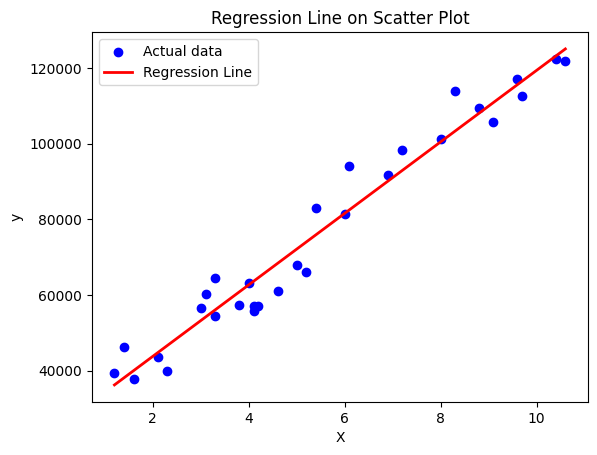

In [25]:
#Plot scatter plot with regression line

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual data')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title("Regression Line on Scatter Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()